# Z-Score for Outlier Detection

The Z-score is a popular statistical method used for outlier detection in a dataset. It measures how many standard deviations an element is from the mean. A Z-score indicates the relative position of a data point in the distribution of the dataset.
- It assumes that the data follows a normal distribution. In non-normal distributions, Z-scores may not work as effectively.
- In the presence of skewed data or heavy-tailed distributions, Z-scores can misidentify or fail to detect outliers accurately.


The formula for the Z-score is given by: $Z = \frac{X - \mu}{\sigma}$.


Where:
- \( $Z$ \) = Z-score (the number of standard deviations from the mean)
- \( $X$ \) = Data point
- \( $\mu$ \) = Mean of the dataset
- \( $\sigma$ \) = Standard deviation of the dataset




## Univariate Z-Score (For a single feature)

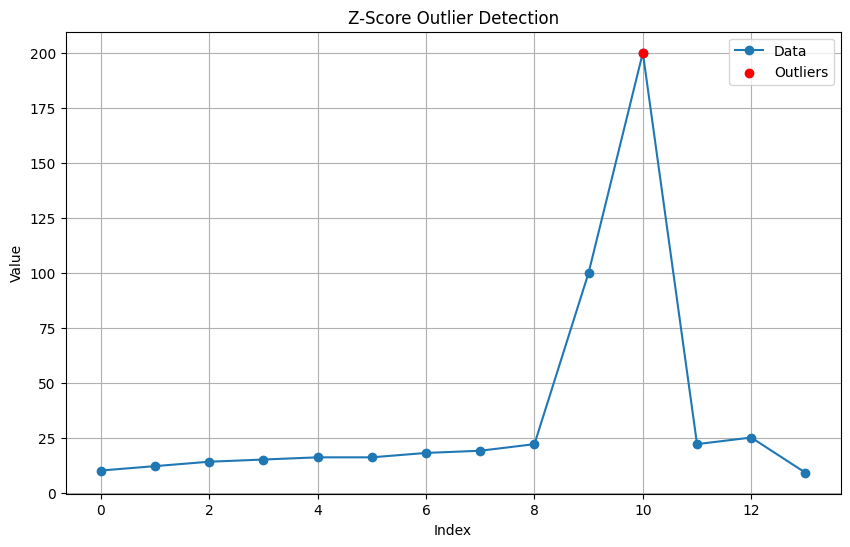

Outliers detected at indices: Index([10], dtype='int64')
Outlier values: [200]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a simple dataset with some outliers
data = [10, 12, 14, 15, 16, 16, 18, 19, 22, 100, 200, 22, 25, 9]

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['Value'])

# 2. Calculate the mean and standard deviation
mean = df['Value'].mean()
std_dev = df['Value'].std()

# 3. Calculate the Z-scores for the data
df['Z-Score'] = (df['Value'] - mean) / std_dev

# 4. Identify outliers using a threshold (e.g., Z-score > 3 or < -3)
outliers = df[df['Z-Score'].abs() > 3]

# 5. Plot the data and mark outliers
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Data', marker='o')
plt.scatter(outliers.index, outliers['Value'], color='red', label='Outliers', zorder=5)
plt.title('Z-Score Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the outliers
print("Outliers detected at indices:", outliers.index)
print("Outlier values:", outliers['Value'].values)


##  Univariate Z-Score with Window Size

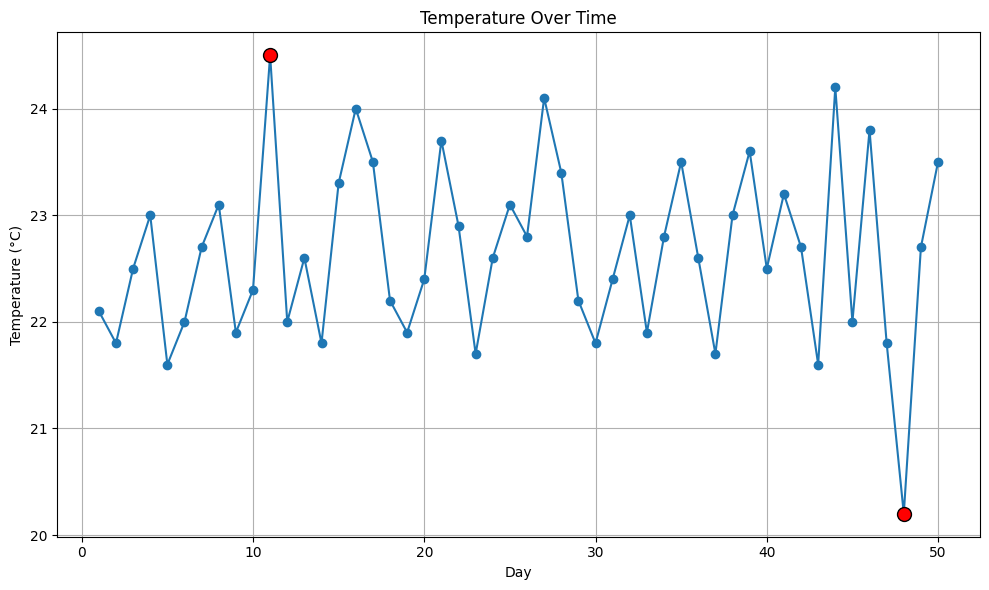

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Time series data (temperature in °C)
data = [
    22.1, 21.8, 22.5, 23.0, 21.6, 22.0, 22.7, 23.1, 21.9, 22.3, 
    24.5, 22.0, 22.6, 21.8, 23.3, 24.0, 23.5, 22.2, 21.9, 22.4, 
    23.7, 22.9, 21.7, 22.6, 23.1, 22.8, 24.1, 23.4, 22.2, 21.8, 
    22.4, 23.0, 21.9, 22.8, 23.5, 22.6, 21.7, 23.0, 23.6, 22.5, 
    23.2, 22.7, 21.6, 24.2, 22.0, 23.8, 21.8, 20.2, 22.7, 23.5
]

days = np.arange(1, len(data) + 1)

# Window size for Z-score calculation
window_size = 10

# Function to calculate Z-scores for time series
def calculate_z_scores(data, window_size):
    z_scores = []
    for i in range(window_size - 1, len(data)):  # Start from window_size-1 to have enough data points
        window = data[i - window_size + 1:i + 1]
        mean = np.mean(window)
        std_dev = np.std(window)
        z_score = (data[i] - mean) / std_dev if std_dev != 0 else 0  # Avoid division by zero
        z_scores.append(z_score)
    return z_scores

# Calculate Z-scores
z_scores = calculate_z_scores(data, window_size)

# Output the Z-scores
#for i in range(len(z_scores)):
#    print(f"Z-score for day {i + window_size}: {z_scores[i]}")


outlier_threshold = 2  # You can adjust this threshold
outliers = [i + window_size for i in range(len(z_scores)) if abs(z_scores[i]) > outlier_threshold]


# Plotting the temperature data
plt.figure(figsize=(10, 6))
plt.plot(days, data, marker='o', color='tab:blue', label="Temperature (°C)")

# Adding labels and title
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")

# Mark outliers
plt.scatter(outliers, [data[i-1] for i in outliers], color='red', zorder=5, label="Outliers", s=100, edgecolor='black')


# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()